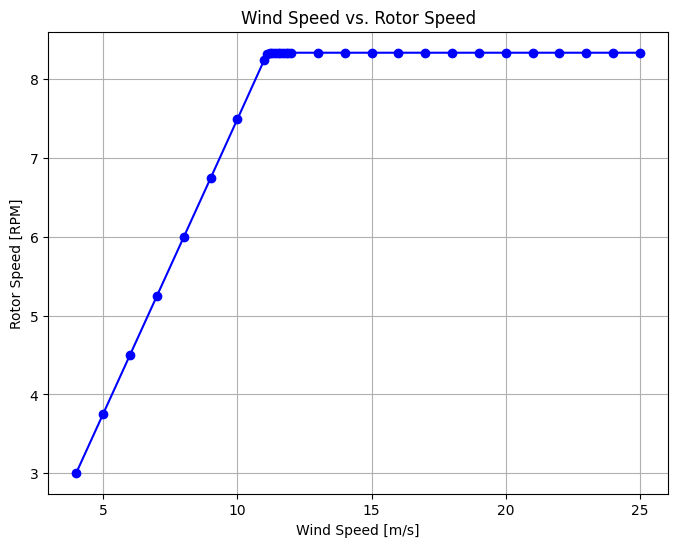

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from lacbox.io import load_oper

# Data from the user's provided table
wind_speed = np.array([4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0])
rotor_speed = np.array([3.005544, 3.753138, 4.501270, 5.248726, 5.996028, 6.743921, 7.493333, 8.245320, 8.325920, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868])

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot( wind_speed,rotor_speed, marker='o', linestyle='-', color='b')
plt.title('Wind Speed vs. Rotor Speed')
plt.ylabel('Rotor Speed [RPM]')
plt.xlabel('Wind Speed [m/s]')
plt.grid(True)
plt.show()

{'ws_ms': array([ 4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 11.1, 11.2, 11.3,
       11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 13. , 14. , 15. , 16. ,
       17. , 18. , 19. , 20. , 21. , 22. , 23. , 24. , 25. ]), 'pitch_deg': array([5.3500000e-04, 5.3500000e-04, 5.3500000e-04, 5.3500000e-04,
       5.3500000e-04, 5.3500000e-04, 5.3500000e-04, 5.3500000e-04,
       5.3500000e-04, 5.3500000e-04, 4.3997000e-02, 9.1222100e-01,
       1.5894150e+00, 2.1619370e+00, 2.6711410e+00, 3.1323720e+00,
       3.5575750e+00, 3.9478340e+00, 6.9630770e+00, 9.2013810e+00,
       1.1098310e+01, 1.2780882e+01, 1.4333106e+01, 1.5784444e+01,
       1.7157523e+01, 1.8466191e+01, 1.9719918e+01, 2.0926538e+01,
       2.2091366e+01, 2.3218339e+01, 2.4308695e+01]), 'rotor_speed_rpm': array([3.005544, 3.753138, 4.50127 , 5.248726, 5.996028, 6.743921,
       7.493333, 8.24532 , 8.32592 , 8.337868, 8.337868, 8.337868,
       8.337868, 8.337868, 8.337868, 8.337868, 8.337868, 8.337868,
       8.337868, 8.337868

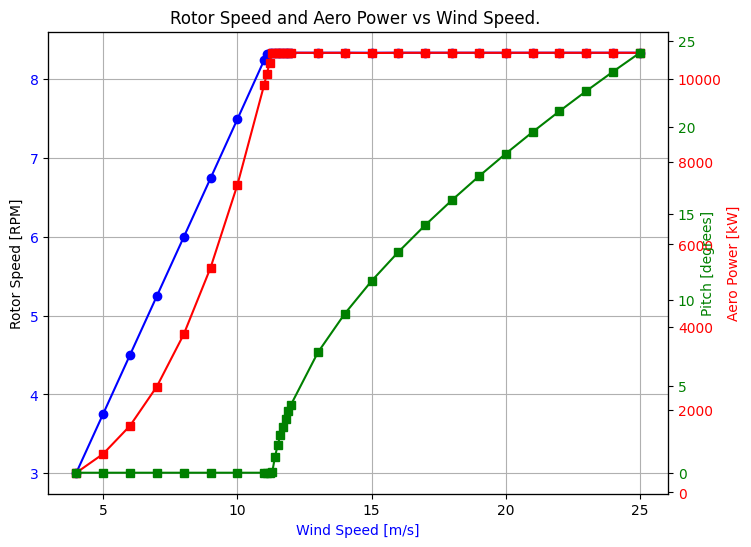

In [3]:
data = load_oper("C:/Users/mathe/OneDrive - Centrale Lille/Documents/Scolarship/_46320 Loads, Aerodynamics and Control of Wind Turbines/Assignments/LAC_repo/assignment_3/dtu_10mw/data/Group1_redesign_flex.opt")
print(data)

wind_speed =data['ws_ms']#[i for i in range(len(data['ws_ms']))]
rotor_speed = data['rotor_speed_rpm']
aero_power = data['power_kw']
pitch = data['pitch_deg']
# Create the plot with a secondary y-axis for power
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot wind speed vs rotor speed
ax1.plot(wind_speed, rotor_speed,  'b-o', label='Rotor Speed [RPM]')
ax1.set_ylabel('Rotor Speed [RPM]')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(wind_speed, aero_power, 'r-s', label='Aero Power [kW]')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(wind_speed, pitch, 'g-s', label='Pitch [degrees]')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Add grid and titles
plt.title('Rotor Speed and Aero Power vs Wind Speed. ')
ax1.grid(True)

plt.show()


In [17]:
rho = 1.225
R = 92.52423873284587
CP_max = 0.4414323017299089
lambda_opt = 7.2631578947368425
eta = 1
Power = 10638.3E+03
V = 11.122788574520852 #m/s
rot_speed = lambda_opt/R*V
omega_T = 0.05*2*np.pi

omega_P = 0.06*2*np.pi

zeta = 0.7

#Taken from the dtu_10mw_hawc2s_ctrl_ctrl_tuning.txt
"""WE MIGHT HAVE TO CHANGE THOSE VALUES"""
I = 0.161050E+09
dqdtheta = -1044.85156E+03*180/(np.pi)

K_opt = (eta * rho * np.pi * R**5 * CP_max / (2 * lambda_opt**3))


K_I_T = eta*(I)*omega_T**2

K_P_T = eta*(2*(I)*omega_T*zeta)

K_I_P = -(I)*omega_P**2/dqdtheta

K_P_P = -(2*(I)*omega_P*zeta+Power/rot_speed**2)/dqdtheta

print(K_opt, K_P_T,K_I_T,K_P_P,K_I_P)

15032154.17367775 70833489.56048906 15894997.88795441 1.6529428050185775 0.3823364811255895
